In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/projectCheckPoint.csv')

In [ ]:
df.head()

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


# **Data Preprocessing**

```
*   removing Hashtag, Mention, URLs
*   text lowercase
*   stemming
*   lemmatizing
*   removing Punctuations
*   removing stopwords
*   sub of emojis
```














In [ ]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.2 MB/s 


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import demoji
import string

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
stopwords.words('english')
print (stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
STOPWORDS = set(stopwords.words('english'))

stemmer = SnowballStemmer('english')
lemmatizer=WordNetLemmatizer()


def clean_text(text):
    
    #removing Hashtag, Mention, URLs
    pattern = re.compile(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)
    text = " ".join(text.split())
    
    #make all text lowercase
    text = text.lower() 

    #stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])

    #lemmatizing
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    
    #removing Punctuations
    remove_punc = re.compile(r"[%s]" % re.escape(string.punctuation))
    text = remove_punc.sub('', text)
    
    #removing stopwords
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS])
    
    # sub of emojis
    emoji = demoji.findall(text)
    for emot in emoji:
        text = re.sub(r"(%s)" % (emot), "_".join(emoji[emot].split()), text)

    return text

In [ ]:
df['cleaned_text'] = df['text'].apply(lambda text: clean_text(text))

In [ ]:
df.head(30)

,text,label,cleaned_text
0,"He said he had not felt that way before, sugge...",1,said felt way sugget go rest trigger ahead you...
1,"Hey there r/assistance, Not sure if this is th...",0,hey rassistance sure right place post goe im c...
2,My mom then hit me with the newspaper and it s...,1,mom hit newspap shock would know dont like pla...
3,"until i met my new boyfriend, he is amazing, h...",1,met new boyfriend amazing kind sweet good stud...
4,October is Domestic Violence Awareness Month a...,1,octob domest violenc awar month domest violenc...
5,I think he doesn't want to put in the effort f...,1,think doesnt want put effort relationship work...
6,It was a big company so luckily I didn't have ...,0,wa big compani luckili didnt see time act thou...
7,It cleared up and I was okay but. On Monday ...,1,clear wa okay monday wa think human brain work...
8,I actually give an assistant half my emergency...,1,actual give assist half emerg fee come help so...
9,I just feel like the street life has fucked my...,1,feel like street life ha fuck head much dont e...


# **Preprocessed Information**

In [ ]:
df.isnull()

,text,label,cleaned_text
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3548,False,False,False
3549,False,False,False
3550,False,False,False
3551,False,False,False


In [ ]:
df['cleaned_text'].duplicated().sum()

24

In [ ]:
df.drop_duplicates("cleaned_text", inplace = True)

In [ ]:
df['label'].value_counts()

1    1857
0    1696
Name: label, dtype: int64

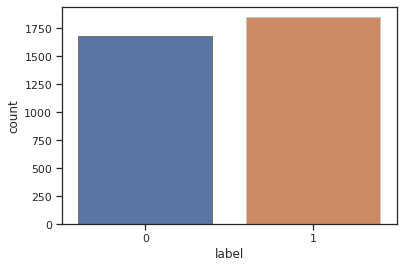

In [ ]:
sns.set_theme(style="ticks")
sns.countplot(data = df, x = 'label', edgecolor=sns.color_palette("RdGy_r", 5))

In [ ]:
# top 50 words for 0 CLASS

    
top50_word = df.cleaned_text[df.label==0].str.split(expand=True).stack().value_counts()[:50]
    
fig = px.bar(top50_word, color=top50_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top50_word.values])
fig.update_traces(marker_color='red')
fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
fig.update_layout(title="Top 50 words for 0",
                     template='simple_white',
                     hovermode='x unified')
fig.show()

In [ ]:
# top 50 words for 1 CLASS

    
top50_word = df.cleaned_text[df.label==1].str.split(expand=True).stack().value_counts()[:50]
    
fig = px.bar(top50_word, color=top50_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top50_word.values])
fig.update_traces(marker_color='green')
fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
fig.update_layout(title="Top 50 words for 1",
                     template='simple_white',
                     hovermode='x unified')
fig.show()